In [1]:
import pandas as pd
import numpy as np

data = pd.read_parquet('./data/harmonized_data.parquet')

In [2]:
data

,AEX,ANJ,ARB,ARR,BMI,BTR,CID,CMI,COU,DET,...,HourEnding,Central MTLF (MWh),Central ActualLoad (MWh),North MTLF (MWh),North ActualLoad (MWh),South MTLF (MWh),South ActualLoad (MWh),MISO MTLF (MWh),MISO ActualLoad (MWh),IsBusinessHour
2015-02-01 05:00:00+00:00,55.94,3.02,30.92,33.08,33.8,53.96,32.0,33.08,37.04,33.98,...,1,37796,36585.39,15885,16150.30,16067,16163.39,69748,68899.08,0
2015-02-01 06:00:00+00:00,55.04,1.04,32.00,33.08,32.9,53.96,32.0,33.08,35.06,33.08,...,2,36589,35509.04,15517,15713.40,15591,15571.34,67697,66793.78,0
2015-02-01 07:00:00+00:00,53.96,-2.02,30.02,33.08,32.9,55.04,32.0,33.08,33.98,33.08,...,3,36067,34970.90,15187,15381.56,15272,15137.39,66526,65489.85,0
2015-02-01 08:00:00+00:00,53.96,-4.00,30.02,33.08,32.9,55.94,32.0,33.08,33.08,30.92,...,4,35855,34708.83,15060,15239.59,15122,14935.61,66037,64884.03,0
2015-02-01 09:00:00+00:00,53.96,-5.98,28.94,32.00,32.9,55.94,32.0,33.08,33.08,28.94,...,5,35835,34709.81,15027,15229.09,15080,14750.43,65942,64689.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 18:00:00+00:00,82.00,33.10,41.00,37.00,46.9,82.90,28.0,50.00,57.90,43.00,...,14,36962,34639.02,19520,18986.41,20296,19868.66,76778,73494.09,0
2021-12-31 19:00:00+00:00,82.90,33.10,42.10,37.00,50.0,82.90,28.0,51.10,60.10,44.10,...,15,36482,34292.13,19486,18907.70,20503,20082.94,76471,73282.77,0
2021-12-31 20:00:00+00:00,82.00,33.10,43.00,37.90,51.1,82.90,28.9,52.00,60.10,45.00,...,16,36151,34236.67,19389,18951.24,20618,20284.04,76158,73471.95,0
2021-12-31 21:00:00+00:00,82.90,32.00,42.10,39.00,51.1,82.00,28.9,53.10,63.00,44.10,...,17,36250,34516.59,19378,19059.35,20621,20303.87,76249,73879.81,0


## Simple Linear 

### Separate Features from Targets

In [23]:
target_name = 'MISO ActualLoad (MWh)'
y = data[target_name]
feature_names = [col for col in data.columns if not col.endswith('(MWh)') and not col == 'Market Day']
X = data[feature_names]
X['Day of Year'] = data['Market Day'].dt.day_of_year

/tmp/ipykernel_2133/2571924590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Day of Year'] = data['Market Day'].dt.day_of_year


#### Split Training and Test

In [28]:
X_train = X.sample(frac=0.8).sort_index()
X_test = X.drop(X_train.index)
y_train = y.drop(X_test.index).sort_index()
y_test = y.drop(X_train.index)
assert(X_train.join(y_train).shape[0] == X_train.shape[0])
assert(X_test.join(y_test).shape[0] == X_test.shape[0])

#### Fit Ordinary Least-Squares

In [29]:
import statsmodels.api as sm
from util import plot_result
model = sm.OLS(y_train, X_train).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     MISO ActualLoad (MWh)   R-squared (uncentered):                   0.975
Model:                               OLS   Adj. R-squared (uncentered):              0.975
Method:                    Least Squares   F-statistic:                          3.072e+04
Date:                   Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                           19:01:48   Log-Likelihood:                     -3.5177e+05
No. Observations:                  32511   AIC:                                  7.036e+05
Df Residuals:                      32470   BIC:                                  7.040e+05
Df Model:                             41                                                  
Covariance Type:               nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
AEX             -317.0677     26.713    -11.870      0.000    -369.425    -264.710
ANJ              -30.5008     12.847     -2.374      0.018     -55.681      -5.320
ARB             -175.3669     23.407     -7.492      0.000    -221.246    -129.488
ARR             -127.8557     24.974     -5.119      0.000    -176.806     -78.905
BMI             -216.5577     36.621     -5.913      0.000    -288.336    -144.779
BTR              165.1494     28.581      5.778      0.000     109.129     221.170
CID             -225.4220     26.249     -8.588      0.000    -276.871    -173.973
CMI             -208.0254     31.750     -6.552      0.000    -270.256    -145.795
COU             -103.2814     27.408     -3.768      0.000    -157.002     -49.560
DET              303.4005     24.811     12.228      0.000     254.769     352.032
DLH             -124.9195     15.217     -8.209      0.000    -154.746     -95.093
DSM              -34.1845     24.246     -1.410      0.159     -81.708      13.339
EAU             -155.7403     23.850     -6.530      0.000    -202.488    -108.993
EVV              179.4920     22.004      8.157      0.000     136.364     222.620
FWA               68.7845     26.637      2.582      0.010      16.576     120.993
GRB              150.6413     23.142      6.509      0.000     105.281     196.001
GRR              757.2022     32.099     23.589      0.000     694.287     820.118
HKS             -178.8494     26.332     -6.792      0.000    -230.461    -127.238
IND             -505.5212     26.583    -19.017      0.000    -557.625    -453.417
JKJ             -107.6862     11.971     -8.995      0.000    -131.150     -84.222
LAN             -389.4519     34.444    -11.307      0.000    -456.963    -321.941
LCH              625.8066     26.950     23.221      0.000     572.984     678.629
LFK              -12.0961     22.280     -0.543      0.587     -55.766      31.574
LFT              206.4935     31.183      6.622      0.000     145.374     267.613
LYV              306.7289     16.119     19.029      0.000     275.134     338.324
MEI              147.0145     20.562      7.150      0.000     106.712     187.317
MKC              405.4065     19.176     21.141      0.000     367.821     442.992
MKE              188.3073     19.227      9.794      0.000     150.622     225.993
MSN             -145.3307     26.448     -5.495      0.000    -197.170     -93.491
MSP               68.1222     25.731      2.647      0.008      17.688     118.557
PIA              -67.7743     35.123     -1.930      0.054    -136.616       1.067
RST             -368.3431     27.629    -13.332      0.000    -422.498    -314.189
SBN              144.1300     24.328      5.92

In [55]:
X_train_pv = X_train[model.pvalues[model.pvalues < 0.05].keys()]
X_test_pv = X_test[model.pvalues[model.pvalues < 0.05].keys()]
model2 = sm.OLS(y_train, X_train_pv).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     MISO ActualLoad (MWh)   R-squared (uncentered):                   0.975
Model:                               OLS   Adj. R-squared (uncentered):              0.975
Method:                    Least Squares   F-statistic:                          3.315e+04
Date:                   Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                           19:24:28   Log-Likelihood:                     -3.5177e+05
No. Observations:                  32511   AIC:                                  7.036e+05
Df Residuals:                      32473   BIC:                                  7.039e+05
Df Model:                             38                                                  
Covariance Type:               nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
AEX             -319.6840     26.108    -12.245      0.000    -370.857    -268.511
ANJ              -29.7613     12.842     -2.318      0.020     -54.931      -4.591
ARB             -173.2813     23.394     -7.407      0.000    -219.134    -127.428
ARR             -130.4482     24.569     -5.309      0.000    -178.604     -82.292
BMI             -252.9377     32.029     -7.897      0.000    -315.715    -190.160
BTR              165.1507     28.568      5.781      0.000     109.156     221.146
CID             -253.5562     22.318    -11.361      0.000    -297.301    -209.812
CMI             -200.8693     31.613     -6.354      0.000    -262.831    -138.907
COU             -108.3134     27.311     -3.966      0.000    -161.843     -54.784
DET              300.2122     24.775     12.117      0.000     251.652     348.773
DLH             -124.2610     15.211     -8.169      0.000    -154.074     -94.448
EAU             -154.2422     23.751     -6.494      0.000    -200.796    -107.689
EVV              181.5546     21.988      8.257      0.000     138.458     224.652
FWA               71.8519     26.588      2.702      0.007      19.739     123.965
GRB              152.5898     23.118      6.600      0.000     107.277     197.902
GRR              757.1619     32.068     23.611      0.000     694.307     820.016
HKS             -180.3751     26.292     -6.860      0.000    -231.909    -128.841
IND             -507.2760     26.562    -19.098      0.000    -559.338    -455.215
JKJ             -107.8518     11.967     -9.012      0.000    -131.308     -84.396
LAN             -388.2444     34.405    -11.284      0.000    -455.680    -320.809
LCH              621.6013     25.942     23.961      0.000     570.754     672.449
LFT              205.0879     31.128      6.589      0.000     144.076     266.100
LYV              300.1730     15.525     19.335      0.000     269.744     330.602
MEI              149.7103     20.524      7.294      0.000     109.482     189.939
MKC              393.9530     17.682     22.280      0.000     359.296     428.610
MKE              187.6711     19.200      9.774      0.000     150.038     225.305
MSN             -146.9499     26.413     -5.564      0.000    -198.721     -95.179
MSP               62.8309     25.488      2.465      0.014      12.874     112.788
RST             -368.2159     27.477    -13.401      0.000    -422.072    -314.360
SBN              141.3250     24.206      5.838      0.000      93.881     188.769
SGF              -76.6771     19.042     -4.027      0.000    -114.000     -39.354
SHV              214.6983     18.879     11.372      0.000     177.694     251.702
SPI              247.3286     32.477      7.61

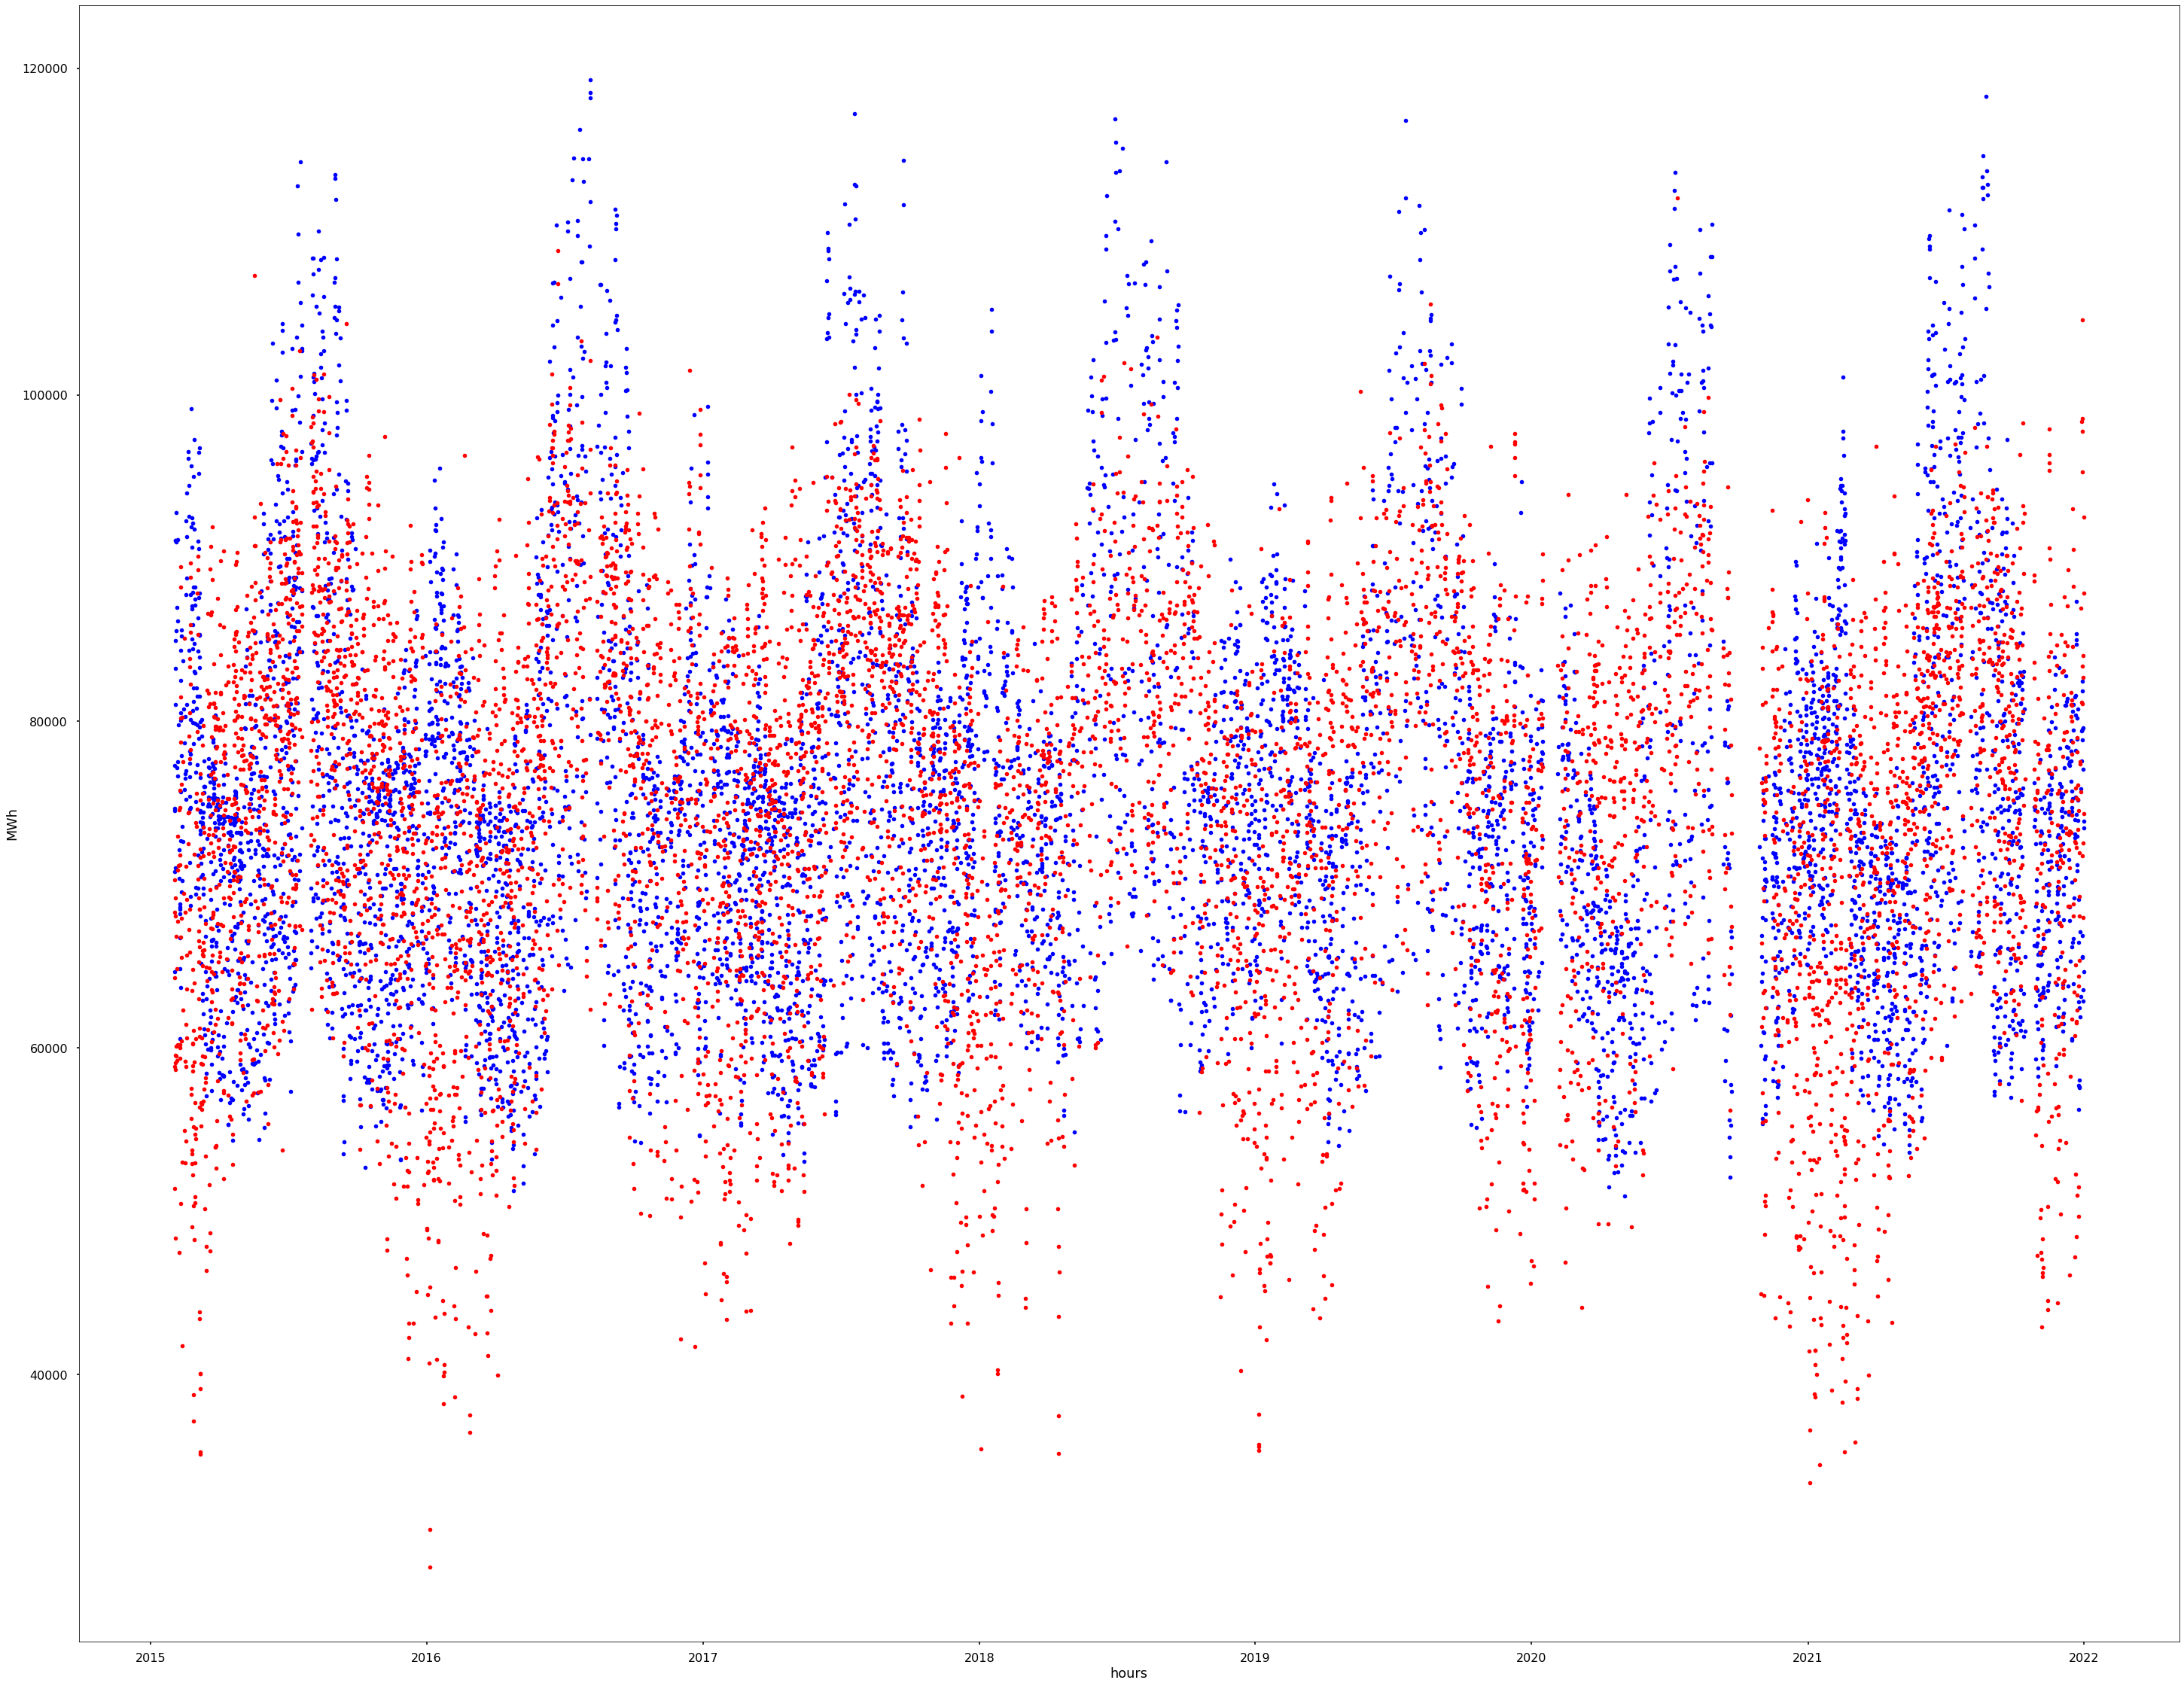

In [56]:
plot_result(model2.predict(X_test_pv), y_test, X_test.index)

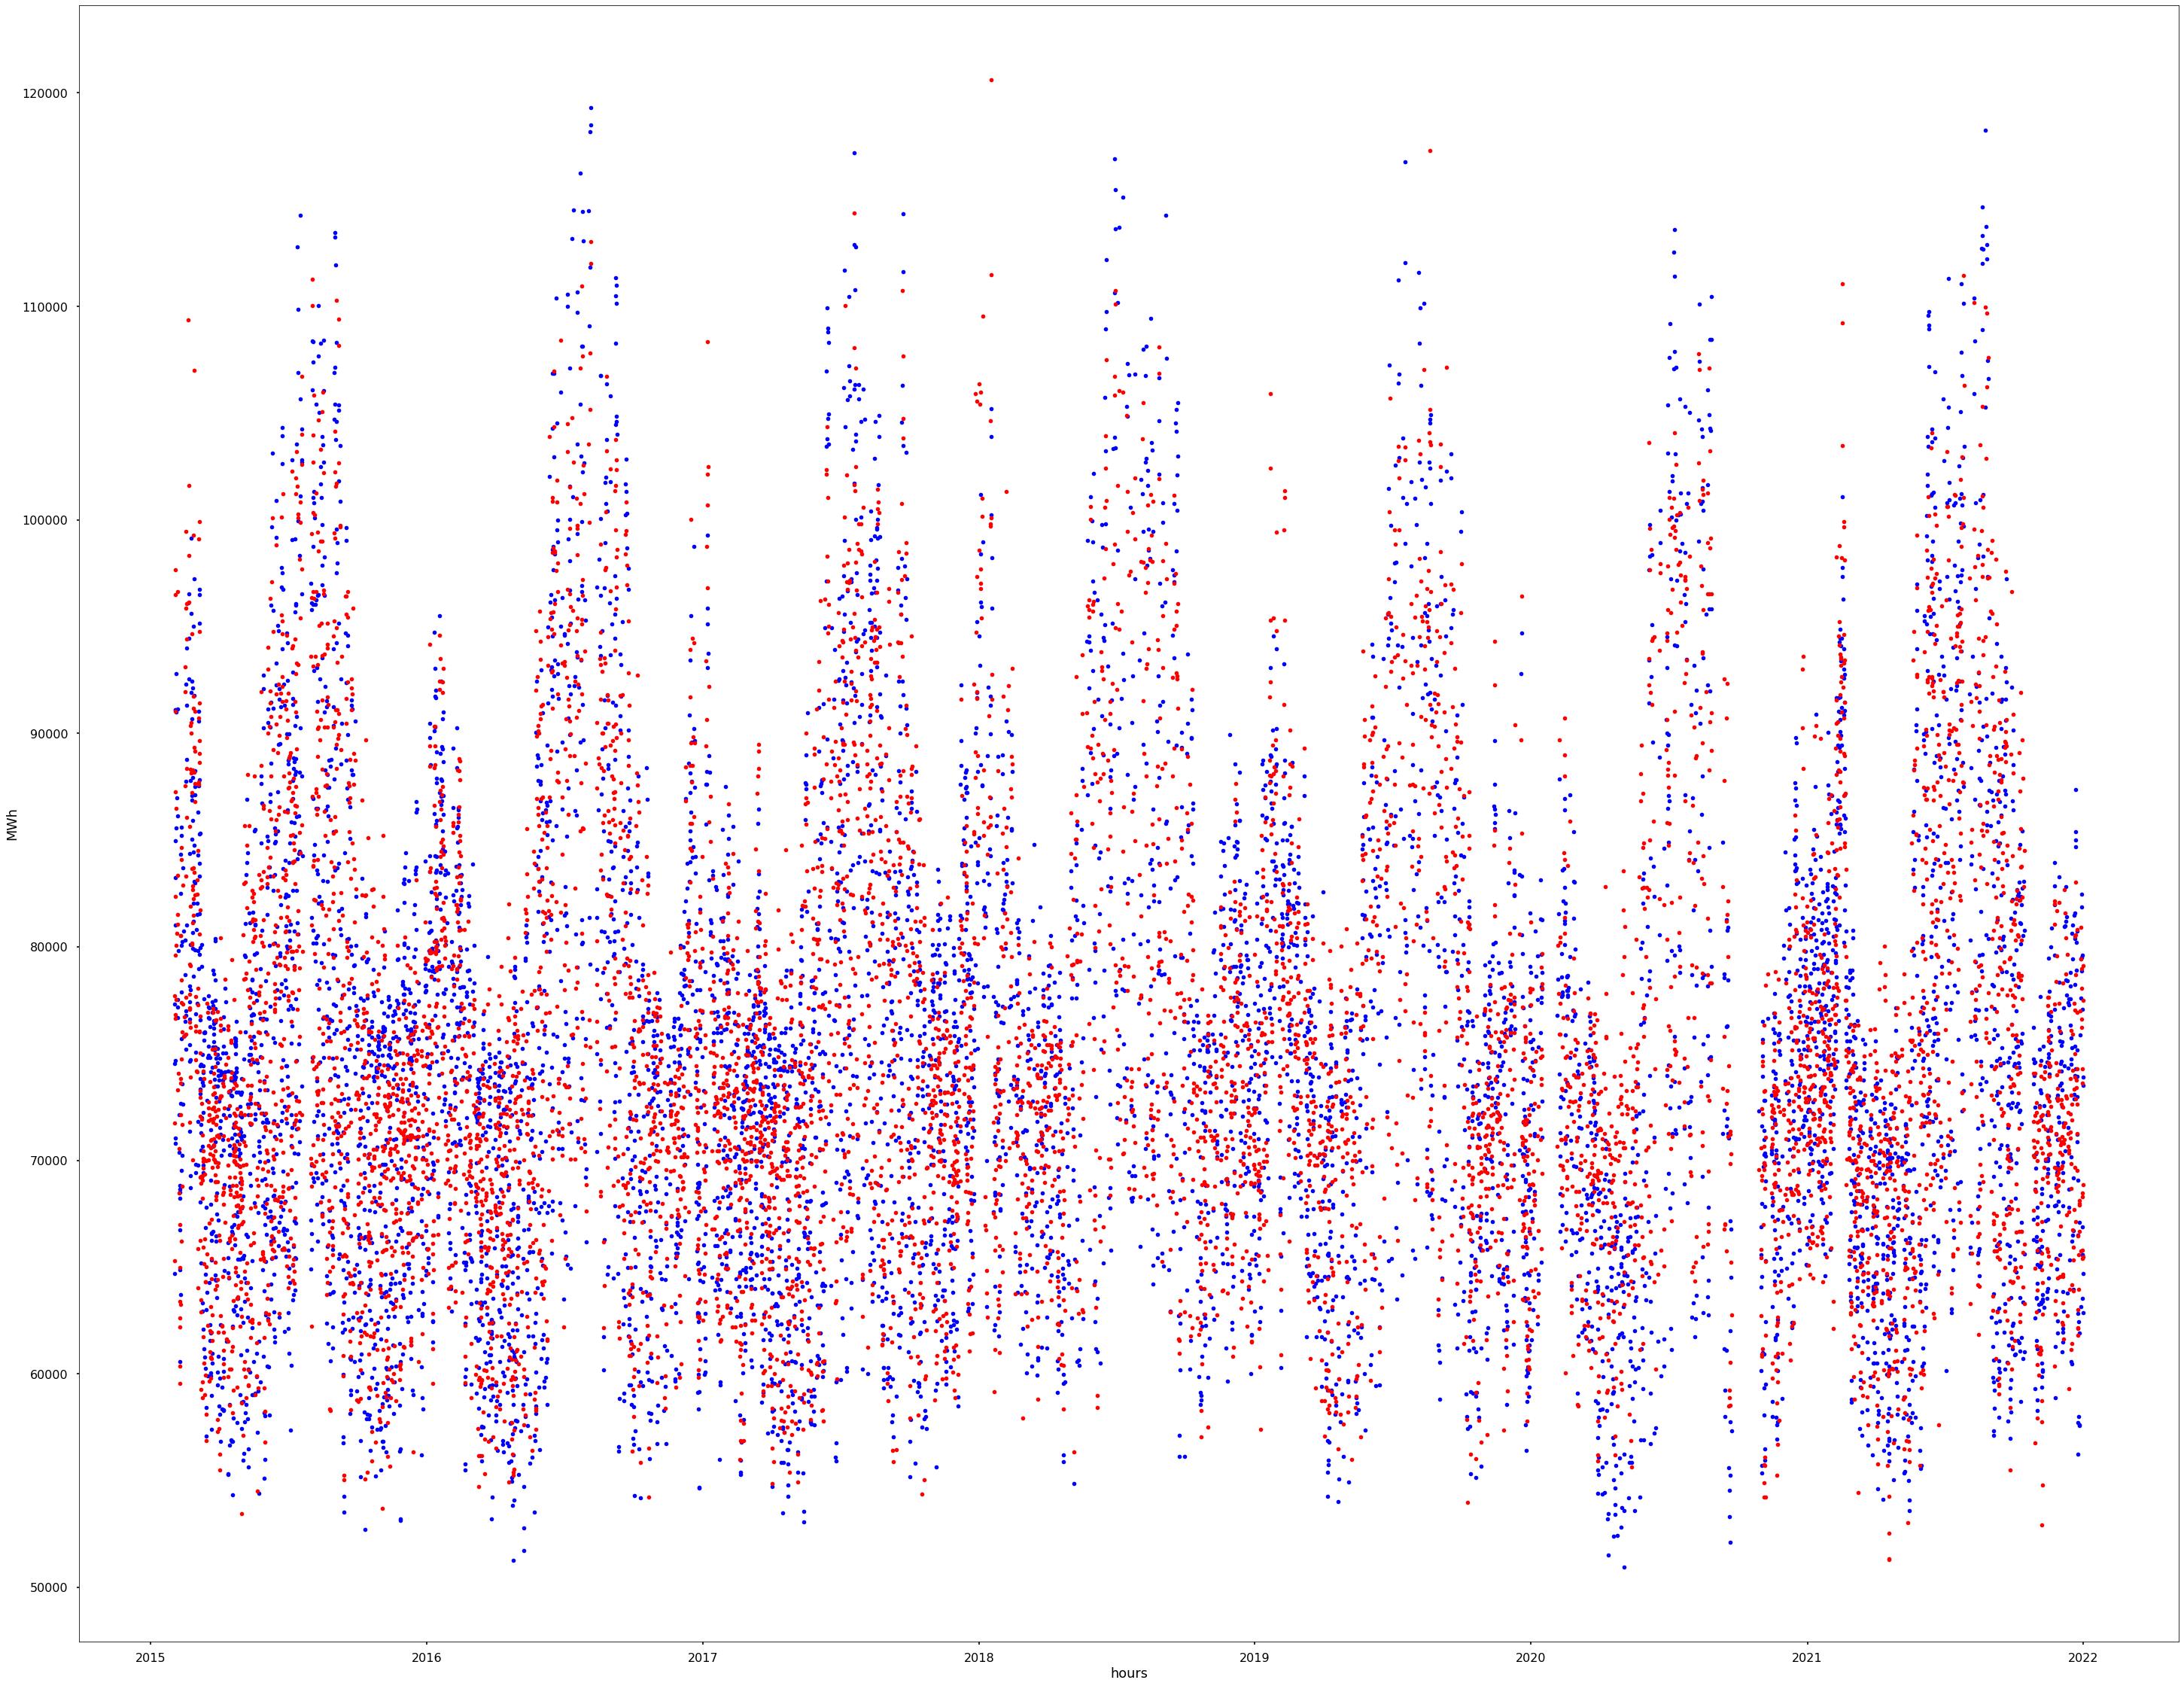

In [59]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=True)
X_poly_train = pf.fit_transform(X_train_pv.copy(), y_train)
X_poly_test = pf.fit_transform(X_test_pv.copy())
model3 = sm.OLS(y_train, X_poly_train).fit()
plot_result(model3.predict(X_poly_test), y_test, X_test.index)